In [41]:
%notebook matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as ps


In [6]:
# A dictionary of movie critics and their ratings of a small
# set of movies
critics={
    'Lisa Rose': {
            'Lady in the Water': 2.5,
            'Snakes on a Plane': 3.5,
             'Just My Luck': 3.0,
            'Superman Returns': 3.5,
            'You, Me and Dupree': 2.5,
             'The Night Listener': 3.0
    },
    'Gene Seymour': {
            'Lady in the Water': 3.0, 
            'Snakes on a Plane': 3.5,
             'Just My Luck': 1.5,
            'Superman Returns': 5.0, 
            'The Night Listener': 3.0,
             'You, Me and Dupree': 3.5
    },
    'Michael Phillips': {
            'Lady in the Water': 2.5, 
            'Snakes on a Plane': 3.0,
             'Superman Returns': 3.5,
            'The Night Listener': 4.0
    },
    'Claudia Puig': {
            'Snakes on a Plane': 3.5, 
             'Just My Luck': 3.0,
             'The Night Listener': 4.5, 
            'Superman Returns': 4.0,
             'You, Me and Dupree': 2.5
    },
    'Mick LaSalle':{
            'Lady in the Water': 3.0, 
            'Snakes on a Plane': 4.0,
             'Just My Luck': 2.0, 
            'Superman Returns': 3.0,
            'The Night Listener': 3.0,
             'You, Me and Dupree': 2.0
    },
    'Jack Matthews': {
            'Lady in the Water': 3.0,
             'Snakes on a Plane': 4.0,
             'The Night Listener': 3.0,
             'Superman Returns': 5.0,
             'You, Me and Dupree': 3.5
    },
    'Toby': {
            'Snakes on a Plane':4.5,
             'You, Me and Dupree':1.0,
             'Superman Returns':4.0
    }
}

In [10]:
critics['Lisa Rose']['Lady in the Water']


2.5

In [11]:
# Finding Similar Users

In [83]:
# Euclidean Distance
snakes='Snakes on a Plane'
dupree='You, Me and Dupree'
Snakes=[]
Dupree=[]
Names=[]
for x in critics:
    Names.append(x)
    if(snakes in critics[x] and dupree in critics[x]):
        Snakes.append(critics[x][snakes])
        Dupree.append(critics[x][dupree])

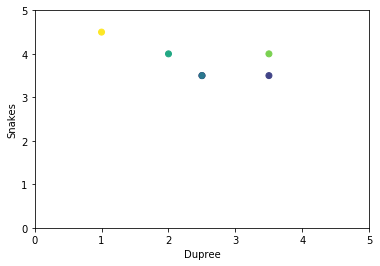

In [88]:
plt.figure()
plt.scatter(x=Dupree,y=Snakes,c=[0,1,2,3,4,5])
ax=plt.gca()
ax.set_xlim(0,5)
ax.set_ylim(0,5)
plt.xlabel('Dupree')
plt.ylabel('Snakes')
plt.show();

In [112]:
from math import sqrt
#Returns a distance- based Similarity Score for person 1 and 
#person2
def sim_distance(prefs,person1,person2):
    # list of shared Items
    si = {}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
            
    # if no ratings is common, return 0
    if len(si)==0:
        return 0
    
    sum_of_squares = [ pow(prefs[person1][item]-prefs[person2][item],2)
                      for item in prefs[person1] if item in prefs[person2]]
    
    return 1/(1+sum(sum_of_squares))

In [113]:
sim_distance(critics,'Lisa Rose','Gene Seymour')

0.14814814814814814